# Credit Score Classification

#### About Dataset

**Problem Statement**
- You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

**Task**
- Given a person’s credit-related information, build a machine learning model that can classify the credit score.

**Features Information**

- **ID -- Represents a unique identification of an entry**
- **Customer_ID -- Represents a unique identification of a person**
- **Month -- Represents the month of the year**
- **Name -- Represents the name of a person**
- **Age -- Represents the age of the person**
- **SSN -- Represents the social security number of a person**
- **Occupation -- Represents the occupation of the person**
- **Annual_Income -- Represents the annual income of the person**
- **Monthly_Inhand_Salary --Represents the monthly base salary of a person**
- **Num_Bank_Accounts -- Represents the number of bank accounts a person holds**
- **Num_Credit_Card --Represents the number of other credit cards held by a person**
- **Interest_Rate -- Represents the interest rate on credit card**
- **Num_of_Loan -- Represents the number of loans taken from the bank**
- **Type_of_Loan -- Represents the types of loan taken by a person**
- **Delay_from_due_date -- Represents the average number of days delayed from the payment date**
- **Num_of_Delayed_Payment -- Represents the average number of payments delayed by a person**
- **Changed_Credit_Limit -- Represents the percentage change in credit card limit**
- **Num_Credit_Inquiries -- Represents the number of credit card inquiries**
- **Credit_Mix --Represents the classification of the mix of credits**
- **Outstanding_Debt -- Represents the remaining debt to be paid (in USD)**
- **Credit_Utilization_Ratio -- Represents the utilization ratio of credit card**
- **Credit_History_Age -- Represents the age of credit history of the person**
- **Payment_of_Min_Amount -- Represents whether only the minimum amount was paid by the person**
- **Total_EMI_per_month -- Represents the monthly EMI payments (in USD)**
- **Amount_invested_monthly -- Represents the monthly amount invested by the customer (in USD)**
- **Payment_Behaviour -- Represents the payment behavior of the customer (in USD)**
- **Monthly_Balance -- Represents the monthly balance amount of the customer (in USD)**
- **Credit_Score --Represents the bracket of credit score (Poor, Standard, Good)**

# Dataset Overview

| Column Name                  | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| **ID**                      | A unique identifier for each record in the dataset.                         |
| **Customer_ID**             | Unique identifier assigned to each customer.                                |
| **Month**                   | Month for which the data entry was recorded.                               |
| **Name**                    | Full name of the customer.                                                  |
| **Age**                     | Age of the customer in years.                                               |
| **SSN**                     | Social Security Number – a unique personal identifier.                      |
| **Occupation**              | Job title or profession of the customer.                                    |
| **Annual_Income**           | Total income earned by the customer in a year (USD).                        |
| **Monthly_Inhand_Salary**  | Monthly base salary received in-hand after deductions (USD).                |
| **Num_Bank_Accounts**       | Number of bank accounts held by the customer.                               |
| **Num_Credit_Card**         | Number of other credit cards held by the customer.                          |
| **Interest_Rate**           | Interest rate applied to the customer's credit card.                        |
| **Num_of_Loan**             | Total number of loans taken by the customer.                                |
| **Type_of_Loan**            | Types of loans taken (e.g., Home Loan, Auto Loan).                          |
| **Delay_from_due_date**     | Average number of days payment is delayed past due date.                    |
| **Num_of_Delayed_Payment**  | Number of delayed payments by the customer.                                 |
| **Changed_Credit_Limit**    | Percentage change in credit card limit.                                     |
| **Num_Credit_Inquiries**    | Number of recent credit card inquiries.                                     |
| **Credit_Mix**              | Classification of the customer's credit portfolio (e.g., Good, Standard).   |
| **Outstanding_Debt**        | Remaining unpaid debt (USD).                                                |
| **Credit_Utilization_Ratio**| Ratio of credit used vs. total available credit.                            |
| **Credit_History_Age**      | Age of the customer’s credit history.                                       |
| **Payment_of_Min_Amount**   | Indicates if only the minimum payment was made (Yes/No/NA).                 |
| **Total_EMI_per_month**     | Monthly EMI payments by the customer (USD).                                 |
| **Amount_invested_monthly** | Monthly amount invested by the customer (USD).                              |
| **Payment_Behaviour**       | Customer’s payment behavior (e.g., Full Payment, Delay, Minimum).           |
| **Monthly_Balance**         | Amount left in account at month's end (USD).                                |
| **Credit_Score**            | Credit score category: Poor, Standard, or Good.                             |


## Import libraries


In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [313]:
pd.set_option('display.max_columns', None)

In [314]:
df = pd.read_csv('./dataset.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


-------

## Data Preprocessing

### Data Cleaning

Convert the object dtype column into INT

In [315]:
into_int = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Bank_Accounts','Num_Credit_Card','Delay_from_due_date', 'Num_Credit_Inquiries']

df[into_int] = df[into_int].apply(pd.to_numeric, errors='coerce').astype('Int64')

Convert the object dtype column into Float

In [316]:
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'].str.replace('_', '', regex=False), errors='coerce')

In [317]:
into_float = ['Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance', 'Interest_Rate']

df[into_float] = df[into_float].apply(pd.to_numeric, errors='coerce')

In [318]:
df.rename(columns={'Interest_Rate':'Interest_Rate_%'}, inplace=True)
df.rename(columns={'Changed_Credit_Limit':'Changed_Credit_Limit_%'},inplace=True)

**Name**

In [319]:
df[['Customer_ID','Name']].head(10)

,Customer_ID,Name
0,CUS_0xd40,Aaron Maashoh
1,CUS_0xd40,Aaron Maashoh
2,CUS_0xd40,Aaron Maashoh
3,CUS_0xd40,Aaron Maashoh
4,CUS_0xd40,Aaron Maashoh
5,CUS_0xd40,Aaron Maashoh
6,CUS_0xd40,Aaron Maashoh
7,CUS_0xd40,NaN
8,CUS_0x21b1,Rick Rothackerj
9,CUS_0x21b1,Rick Rothackerj


In [320]:
df['Name'] = df['Name'].fillna(df.groupby('Customer_ID')['Name'].transform('first'))

In [321]:
df[['Customer_ID','Name']].head(10)

,Customer_ID,Name
0,CUS_0xd40,Aaron Maashoh
1,CUS_0xd40,Aaron Maashoh
2,CUS_0xd40,Aaron Maashoh
3,CUS_0xd40,Aaron Maashoh
4,CUS_0xd40,Aaron Maashoh
5,CUS_0xd40,Aaron Maashoh
6,CUS_0xd40,Aaron Maashoh
7,CUS_0xd40,Aaron Maashoh
8,CUS_0x21b1,Rick Rothackerj
9,CUS_0x21b1,Rick Rothackerj


**Age**

In [322]:
df[['Customer_ID','Age']].head(10)

,Customer_ID,Age
0,CUS_0xd40,23
1,CUS_0xd40,23
2,CUS_0xd40,-500
3,CUS_0xd40,23
4,CUS_0xd40,23
5,CUS_0xd40,23
6,CUS_0xd40,23
7,CUS_0xd40,23
8,CUS_0x21b1,<NA>
9,CUS_0x21b1,28


In [323]:
invalid_age_mask = (df['Age'] < 0) | (df['Age'] > 60)

valid_ages = df[~invalid_age_mask].groupby('Customer_ID')['Age'].transform('first')

df.loc[invalid_age_mask, 'Age'] = df.loc[invalid_age_mask, 'Customer_ID'].map(df[~invalid_age_mask]
                                                                              .groupby('Customer_ID')['Age'].first())

In [324]:
df['Age'] = df['Age'].fillna(df.groupby('Customer_ID')['Age'].transform('first'))

In [325]:
df[['Customer_ID','Age']].head(10)

,Customer_ID,Age
0,CUS_0xd40,23
1,CUS_0xd40,23
2,CUS_0xd40,23
3,CUS_0xd40,23
4,CUS_0xd40,23
5,CUS_0xd40,23
6,CUS_0xd40,23
7,CUS_0xd40,23
8,CUS_0x21b1,28
9,CUS_0x21b1,28


**SSN**

In [326]:
df.drop(columns=['SSN'],inplace=True)

**Occupation**

In [327]:
df[['Customer_ID','Occupation']].head(10)

,Customer_ID,Occupation
0,CUS_0xd40,Scientist
1,CUS_0xd40,Scientist
2,CUS_0xd40,Scientist
3,CUS_0xd40,Scientist
4,CUS_0xd40,Scientist
5,CUS_0xd40,Scientist
6,CUS_0xd40,Scientist
7,CUS_0xd40,Scientist
8,CUS_0x21b1,_______
9,CUS_0x21b1,Teacher


In [328]:
bad_occupation = '_______'

valid_occ_df = df[df['Occupation'] != bad_occupation]

valid_occ_map = (valid_occ_df.drop_duplicates(subset=['Customer_ID', 'Occupation'])
                 .groupby('Customer_ID')['Occupation'].first())

bad_occ_mask = df['Occupation'] == bad_occupation

df.loc[bad_occ_mask, 'Occupation'] = df.loc[bad_occ_mask, 'Customer_ID'].map(valid_occ_map)

In [329]:
df[['Customer_ID','Occupation']].head(10)

,Customer_ID,Occupation
0,CUS_0xd40,Scientist
1,CUS_0xd40,Scientist
2,CUS_0xd40,Scientist
3,CUS_0xd40,Scientist
4,CUS_0xd40,Scientist
5,CUS_0xd40,Scientist
6,CUS_0xd40,Scientist
7,CUS_0xd40,Scientist
8,CUS_0x21b1,Teacher
9,CUS_0x21b1,Teacher


**Annual Income**

In [330]:
df[df['Customer_ID'] == 'CUS_0x284a']['Annual_Income']

48      131313.4
49      131313.4
50      131313.4
51      131313.4
52      131313.4
53      131313.4
54    10909427.0
55      131313.4
Name: Annual_Income, dtype: float64

In [331]:
income_threshold = 250000
valid_income_df = df[df['Annual_Income'] <= income_threshold]

valid_income_map = (valid_income_df.drop_duplicates(subset=['Customer_ID', 'Annual_Income'])
                    .groupby('Customer_ID')['Annual_Income'].min())

mask = df['Annual_Income'] > income_threshold
df.loc[mask, 'Annual_Income'] = df.loc[mask, 'Customer_ID'].map(valid_income_map)

In [332]:
df['Annual_Income'] = df['Annual_Income'].fillna(df.groupby('Customer_ID')['Annual_Income'].transform('first'))

In [333]:
df['Annual_Income'].describe()

count    100000.000000
mean      50505.123449
std       38299.422093
min        7005.930000
25%       19342.972500
50%       36999.705000
75%       71683.470000
max      179987.280000
Name: Annual_Income, dtype: float64

In [334]:
df[df['Customer_ID'] == 'CUS_0x284a']['Annual_Income']

48    131313.4
49    131313.4
50    131313.4
51    131313.4
52    131313.4
53    131313.4
54    131313.4
55    131313.4
Name: Annual_Income, dtype: float64

**Monthly_Inhand_Salary**

In [335]:
df[df['Customer_ID'] == 'CUS_0xd40']['Monthly_Inhand_Salary']

0    1824.843333
1            NaN
2            NaN
3            NaN
4    1824.843333
5            NaN
6    1824.843333
7    1824.843333
Name: Monthly_Inhand_Salary, dtype: float64

In [336]:
df['Monthly_Inhand_Salary'].replace(np.nan, 0.0, inplace=True)

zero_salary_mask = df['Monthly_Inhand_Salary'] == 0.0
valid_salary_df = df[df['Monthly_Inhand_Salary'] > 0.0]

valid_salary_map = (valid_salary_df.drop_duplicates(subset=['Customer_ID', 'Monthly_Inhand_Salary'])
                    .groupby('Customer_ID')['Monthly_Inhand_Salary'].max())

df.loc[zero_salary_mask, 'Monthly_Inhand_Salary'] = (df.loc[zero_salary_mask, 'Customer_ID'].map(valid_salary_map))

In [337]:
df[df['Customer_ID'] == 'CUS_0xd40']['Monthly_Inhand_Salary']

0    1824.843333
1    1824.843333
2    1824.843333
3    1824.843333
4    1824.843333
5    1824.843333
6    1824.843333
7    1824.843333
Name: Monthly_Inhand_Salary, dtype: float64

**Num_Bank_Accounts**

In [338]:
df[df['Customer_ID'] == 'CUS_0x1619']['Num_Bank_Accounts']

99912      8
99913      8
99914      8
99915      8
99916    182
99917      8
99918      8
99919      8
Name: Num_Bank_Accounts, dtype: Int64

In [339]:
invalid_mask = (df['Num_Bank_Accounts'] < 0) | (df['Num_Bank_Accounts'] > 11)
valid_df = df[(df['Num_Bank_Accounts'] >= 0) & (df['Num_Bank_Accounts'] <= 11)]

valid_map = (valid_df.drop_duplicates(subset=['Customer_ID', 'Num_Bank_Accounts'])
             .groupby('Customer_ID')['Num_Bank_Accounts'].first())

df.loc[invalid_mask, 'Num_Bank_Accounts'] = (df.loc[invalid_mask, 'Customer_ID'].map(valid_map))

In [340]:
df[df['Customer_ID'] == 'CUS_0x1619']['Num_Bank_Accounts']

99912    8
99913    8
99914    8
99915    8
99916    8
99917    8
99918    8
99919    8
Name: Num_Bank_Accounts, dtype: Int64

**Num_Credit_Card**

In [341]:
df[df['Customer_ID']== 'CUS_0x21b1']['Num_Credit_Card']

8        4
9        4
10    1385
11       4
12       4
13       4
14       4
15       4
Name: Num_Credit_Card, dtype: Int64

In [342]:
df.loc[df['Num_Credit_Card'] > 10, 'Num_Credit_Card'] = np.nan

df.loc[df['Num_Credit_Card'] < 1, 'Num_Credit_Card'] = np.nan

df['Num_Credit_Card'] = df['Num_Credit_Card'].fillna(df.groupby('Customer_ID')['Num_Credit_Card'].transform('first'))

In [343]:
df[df['Customer_ID']== 'CUS_0x21b1']['Num_Credit_Card']

8     4
9     4
10    4
11    4
12    4
13    4
14    4
15    4
Name: Num_Credit_Card, dtype: Int64

**Interest_Rate_%**

In [344]:
df[df['Customer_ID']== 'CUS_0x95ee']['Interest_Rate_%']

40       8
41       8
42       8
43       8
44    5318
45       8
46       8
47       8
Name: Interest_Rate_%, dtype: int64

In [345]:
df.loc[df['Interest_Rate_%'] > 36, 'Interest_Rate_%'] = np.nan

df['Interest_Rate_%'] = df['Interest_Rate_%'].fillna(df.groupby('Customer_ID')['Interest_Rate_%'].transform('first'))

In [346]:
df[df['Customer_ID']== 'CUS_0x95ee']['Interest_Rate_%']

40    8.0
41    8.0
42    8.0
43    8.0
44    8.0
45    8.0
46    8.0
47    8.0
Name: Interest_Rate_%, dtype: float64

**Num_of_Loan**

In [347]:
df[df['Customer_ID']== 'CUS_0x284a']['Num_of_Loan']

48       2
49       2
50       2
51       2
52       2
53    -100
54       2
55       2
Name: Num_of_Loan, dtype: Int64

In [348]:
df.loc[(df['Num_of_Loan'] < 0) | (df['Num_of_Loan'] > 9), 'Num_of_Loan'] = np.nan

df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df.groupby('Customer_ID')['Num_of_Loan'].transform('first'))

In [349]:
df[df['Customer_ID']== 'CUS_0x284a']['Num_of_Loan']

48    2
49    2
50    2
51    2
52    2
53    2
54    2
55    2
Name: Num_of_Loan, dtype: Int64

**Type_of_Loan**

In [350]:
df['Type_of_Loan']= df['Type_of_Loan'].str.split(',').str[0]

**Delay_from_due_date**

In [351]:
df[df['Customer_ID']== 'CUS_0xd40']['Delay_from_due_date']

0     3
1    -1
2     3
3     5
4     6
5     8
6     3
7     3
Name: Delay_from_due_date, dtype: Int64

In [352]:
invalid_delay_mask = df['Delay_from_due_date'] < 0

valid_delays = df[df['Delay_from_due_date'] >= 0]
delay_map = (valid_delays.drop_duplicates(subset=['Customer_ID', 'Delay_from_due_date'])
             .groupby('Customer_ID')['Delay_from_due_date'].first())

df.loc[invalid_delay_mask, 'Delay_from_due_date'] = (df.loc[invalid_delay_mask, 'Customer_ID'].map(delay_map))

In [353]:
df[df['Customer_ID']== 'CUS_0xd40']['Delay_from_due_date']

0    3
1    3
2    3
3    5
4    6
5    8
6    3
7    3
Name: Delay_from_due_date, dtype: Int64

**Num_of_Delayed_Payment**

In [354]:
df[df['Customer_ID']== 'CUS_0xd40']['Num_of_Delayed_Payment']

0       7
1    <NA>
2       7
3       4
4    <NA>
5       4
6    <NA>
7       6
Name: Num_of_Delayed_Payment, dtype: Int64

In [355]:
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].abs()
df.loc[df['Num_of_Delayed_Payment'] > 30, 'Num_of_Delayed_Payment'] = np.nan

In [356]:
mode_map = (df[df['Num_of_Delayed_Payment'].notna()].groupby('Customer_ID')['Num_of_Delayed_Payment']
            .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

missing_mask = df['Num_of_Delayed_Payment'].isna()
df.loc[missing_mask, 'Num_of_Delayed_Payment'] = (df.loc[missing_mask, 'Customer_ID'].map(mode_map))

In [357]:
df[df['Customer_ID']== 'CUS_0xd40']['Num_of_Delayed_Payment']

0    7
1    4
2    7
3    4
4    4
5    4
6    4
7    6
Name: Num_of_Delayed_Payment, dtype: Int64

**Num_Credit_Inquiries**

In [358]:
mode_values = df[~df['Num_Credit_Inquiries'].isna() & 
                       (df['Num_Credit_Inquiries'] <= 20)] \
              .groupby('Customer_ID')['Num_Credit_Inquiries'] \
              .agg(lambda x: x.mode()[0])

mask = df['Num_Credit_Inquiries'].isna() | (df['Num_Credit_Inquiries'] > 20)
df.loc[mask, 'Num_Credit_Inquiries'] = df.loc[mask, 'Customer_ID'].map(mode_values)

**Credit_Mix**

In [359]:
df[df['Customer_ID']=='CUS_0x942c']['Credit_Mix']

99992       _
99993    Good
99994       _
99995       _
99996       _
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, dtype: object

In [360]:
credit_mix_map = df[df['Credit_Mix'] != '_'].groupby('Customer_ID')['Credit_Mix'].agg(lambda x: x.mode()[0])
mask = df['Credit_Mix'] == '_'

df.loc[mask, 'Credit_Mix'] = df.loc[mask, 'Customer_ID'].map(credit_mix_map)

In [361]:
df[df['Customer_ID']=='CUS_0x942c']['Credit_Mix']

99992    Good
99993    Good
99994    Good
99995    Good
99996    Good
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, dtype: object

**Outstanding_Debt**

In [362]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(df.groupby('Customer_ID')['Outstanding_Debt'].transform('first'))

**Credit_History_Age**

In [363]:
df[df['Customer_ID']=='CUS_0xf16']['Credit_History_Age']

99968                      NaN
99969    21 Years and 2 Months
99970    21 Years and 3 Months
99971    21 Years and 4 Months
99972    21 Years and 5 Months
99973    21 Years and 6 Months
99974    21 Years and 7 Months
99975                      NaN
Name: Credit_History_Age, dtype: object

In [364]:
def add_months_to_string(age_str, offset):
    years, months = map(int, age_str.replace(" Years and ", ",").replace(" Months", "").split(","))
    total_months = years * 12 + months + offset
    total_months = max(total_months, 0) 
    return f"{total_months // 12} Years and {total_months % 12} Months"

def fill_credit_history(group):
    group = group.copy()
    history = group['Credit_History_Age'].tolist()
    for i in range(len(history)):
        if pd.isna(history[i]):
            prev = next((history[j] for j in range(i - 1, -1, -1) if pd.notna(history[j])), None)
            next_ = next((history[j] for j in range(i + 1, len(history)) if pd.notna(history[j])), None)
            if prev:
                history[i] = add_months_to_string(prev, 1)
            elif next_:
                history[i] = add_months_to_string(next_, -1)
            else:
                history[i] = "0 Years and 0 Months"
    group['Credit_History_Age'] = history
    return group

df['original_index'] = df.index
df_sorted = df.sort_values(by='Customer_ID')
df_filled = df_sorted.groupby('Customer_ID').apply(fill_credit_history).reset_index(drop=True)
df = df_filled.sort_values(by='original_index').drop(columns='original_index').reset_index(drop=True)

In [365]:
df[df['Customer_ID']=='CUS_0xf16']['Credit_History_Age']

99968    21 Years and 9 Months
99969    21 Years and 2 Months
99970    21 Years and 3 Months
99971    21 Years and 4 Months
99972    21 Years and 5 Months
99973    21 Years and 6 Months
99974    21 Years and 7 Months
99975    21 Years and 8 Months
Name: Credit_History_Age, dtype: object

**Payment_of_Min_Amount**

In [366]:
df[df['Customer_ID']=='CUS_0x21b1']['Payment_of_Min_Amount']	

8     No
9     No
10    No
11    No
12    No
13    No
14    NM
15    No
Name: Payment_of_Min_Amount, dtype: object

In [367]:
df['Payment_of_Min_Amount']= df['Payment_of_Min_Amount'].replace('NM', np.nan)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].fillna(df.groupby('Customer_ID')['Payment_of_Min_Amount'].transform('first'))

In [368]:
df[df['Customer_ID']=='CUS_0x21b1']['Payment_of_Min_Amount']	

8     No
9     No
10    No
11    No
12    No
13    No
14    No
15    No
Name: Payment_of_Min_Amount, dtype: object

**Total_EMI_per_month**

In [369]:
df[df['Total_EMI_per_month']== 0]['Num_of_Loan']

32       0
33       0
34       0
35       0
36       0
        ..
99939    0
99940    0
99941    0
99942    0
99943    0
Name: Num_of_Loan, Length: 10613, dtype: Int64

In [370]:
df[df['Customer_ID'] == 'CUS_0x8600']['Total_EMI_per_month']

99984       60.964772
99985    12112.000000
99986       60.964772
99987       60.964772
99988       60.964772
99989       60.964772
99990       60.964772
99991       60.964772
Name: Total_EMI_per_month, dtype: float64

In [371]:
df.loc[df['Total_EMI_per_month']> 2000,'Total_EMI_per_month']= np.nan
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].fillna(df.groupby('Customer_ID')['Total_EMI_per_month'].transform('first'))

In [372]:
df[df['Customer_ID'] == 'CUS_0x8600']['Total_EMI_per_month']

99984    60.964772
99985    60.964772
99986    60.964772
99987    60.964772
99988    60.964772
99989    60.964772
99990    60.964772
99991    60.964772
Name: Total_EMI_per_month, dtype: float64

**Amount_invested_monthly**

In [373]:
df[df['Customer_ID']=='CUS_0xf16']['Amount_invested_monthly']

99968     52.951978
99969    104.646237
99970     75.504972
99971    199.988581
99972     64.549748
99973           NaN
99974           NaN
99975     70.805550
Name: Amount_invested_monthly, dtype: float64

In [374]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df.groupby('Customer_ID')['Amount_invested_monthly'].transform('first'))

In [375]:
df[df['Customer_ID']=='CUS_0xf16']['Amount_invested_monthly']

99968     52.951978
99969    104.646237
99970     75.504972
99971    199.988581
99972     64.549748
99973     52.951978
99974     52.951978
99975     70.805550
Name: Amount_invested_monthly, dtype: float64

**Payment_Behaviour**

In [376]:
df[df['Customer_ID']=='CUS_0xaf61']['Payment_Behaviour']

99976      Low_spent_Small_value_payments
99977     High_spent_Large_value_payments
99978     Low_spent_Medium_value_payments
99979      Low_spent_Small_value_payments
99980                              !@9#%8
99981      Low_spent_Small_value_payments
99982                              !@9#%8
99983    High_spent_Medium_value_payments
Name: Payment_Behaviour, dtype: object

In [377]:
df.loc[df['Payment_Behaviour']=='!@9#%8','Payment_Behaviour']= np.nan
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(df.groupby('Customer_ID')['Payment_Behaviour'].transform('first'))

In [378]:
df[df['Customer_ID']=='CUS_0xaf61']['Payment_Behaviour']

99976      Low_spent_Small_value_payments
99977     High_spent_Large_value_payments
99978     Low_spent_Medium_value_payments
99979      Low_spent_Small_value_payments
99980      Low_spent_Small_value_payments
99981      Low_spent_Small_value_payments
99982      Low_spent_Small_value_payments
99983    High_spent_Medium_value_payments
Name: Payment_Behaviour, dtype: object

---------

### Summary of Dataset

In [379]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  Int64  
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     100000 non-null  float64
 8   Num_Bank_Accounts         100000 non-null  Int64  
 9   Num_Credit_Card           100000 non-null  Int64  
 10  Interest_Rate_%           100000 non-null  float64
 11  Num_of_Loan               100000 non-null  Int64  
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  In

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.28996,10.764717,14.0,24.0,33.0,42.0,56.0
Annual_Income,100000.0,50505.123449,38299.422093,7005.93,19342.9725,36999.705,71683.47,179987.28
Monthly_Inhand_Salary,100000.0,4199.890282,3188.480516,303.645417,1626.761667,3096.836667,5964.883333,15204.633333
Num_Bank_Accounts,100000.0,5.3688,2.593248,0.0,3.0,5.0,7.0,11.0
Num_Credit_Card,100000.0,5.53342,2.065847,1.0,4.0,5.0,7.0,10.0
Interest_Rate_%,100000.0,14.53208,8.74133,1.0,7.0,13.0,20.0,34.0
Num_of_Loan,100000.0,3.53288,2.446356,0.0,2.0,3.0,5.0,9.0
Delay_from_due_date,100000.0,21.09268,14.826122,0.0,10.0,18.0,28.0,67.0
Num_of_Delayed_Payment,100000.0,13.32901,6.256865,0.0,9.0,14.0,18.0,28.0
Changed_Credit_Limit_%,97909.0,10.389025,6.789496,-6.49,5.32,9.4,14.87,36.97


In [380]:
num = df.select_dtypes(include=['number']).columns

for i in num:
    print(f'Unique values of {i}: {df[i].nunique()}')
    print(f'Values Counts of: {df[i].value_counts()}')
    print(f'Unique values: {df[i].unique()}')
    print('=' * 70)
    print('\n')

Unique values of Age: 43
Values Counts of: Age
38    3079
28    3060
31    3060
26    3039
25    2956
36    2954
32    2952
35    2933
34    2926
27    2924
39    2919
44    2904
19    2880
41    2859
22    2858
37    2828
29    2825
20    2822
21    2821
43    2809
24    2778
30    2775
23    2743
45    2721
40    2708
33    2638
42    2636
18    2464
46    1636
15    1619
17    1544
16    1497
48    1431
49    1413
52    1394
55    1394
53    1389
54    1336
51    1324
50    1316
14    1244
47    1243
56     349
Name: count, dtype: Int64
Unique values: <IntegerArray>
[23, 28, 34, 54, 55, 21, 31, 33, 30, 24, 44, 45, 40, 41, 32, 35, 36, 39, 37,
 20, 46, 26, 42, 19, 48, 38, 43, 22, 16, 18, 15, 27, 25, 14, 17, 47, 53, 56,
 29, 49, 51, 50, 52]
Length: 43, dtype: Int64


Unique values of Annual_Income: 12488
Values Counts of: Annual_Income
20867.670    16
9141.630     16
32543.380    16
40341.160    16
22434.160    16
             ..
18317.260     8
14784.450     8
60573.960     8
18413.79

In [381]:
cat = df.select_dtypes(include=['object']).columns
for i in cat:
    print(f'Unique values of {i}: {df[i].nunique()}')
    print(f'Values Counts of: {df[i].value_counts()}')
    print(f'Unique values: {df[i].unique()}')
    print('=' * 70)
    print('\n')

Unique values of ID: 100000
Values Counts of: ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
Unique values: ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']


Unique values of Customer_ID: 12500
Values Counts of: Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
Unique values: ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']


Unique values of Month: 8
Values Counts of: Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Unique values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

------------

### Handle Missing Values

In [382]:
import missingno as msn

<Axes: >

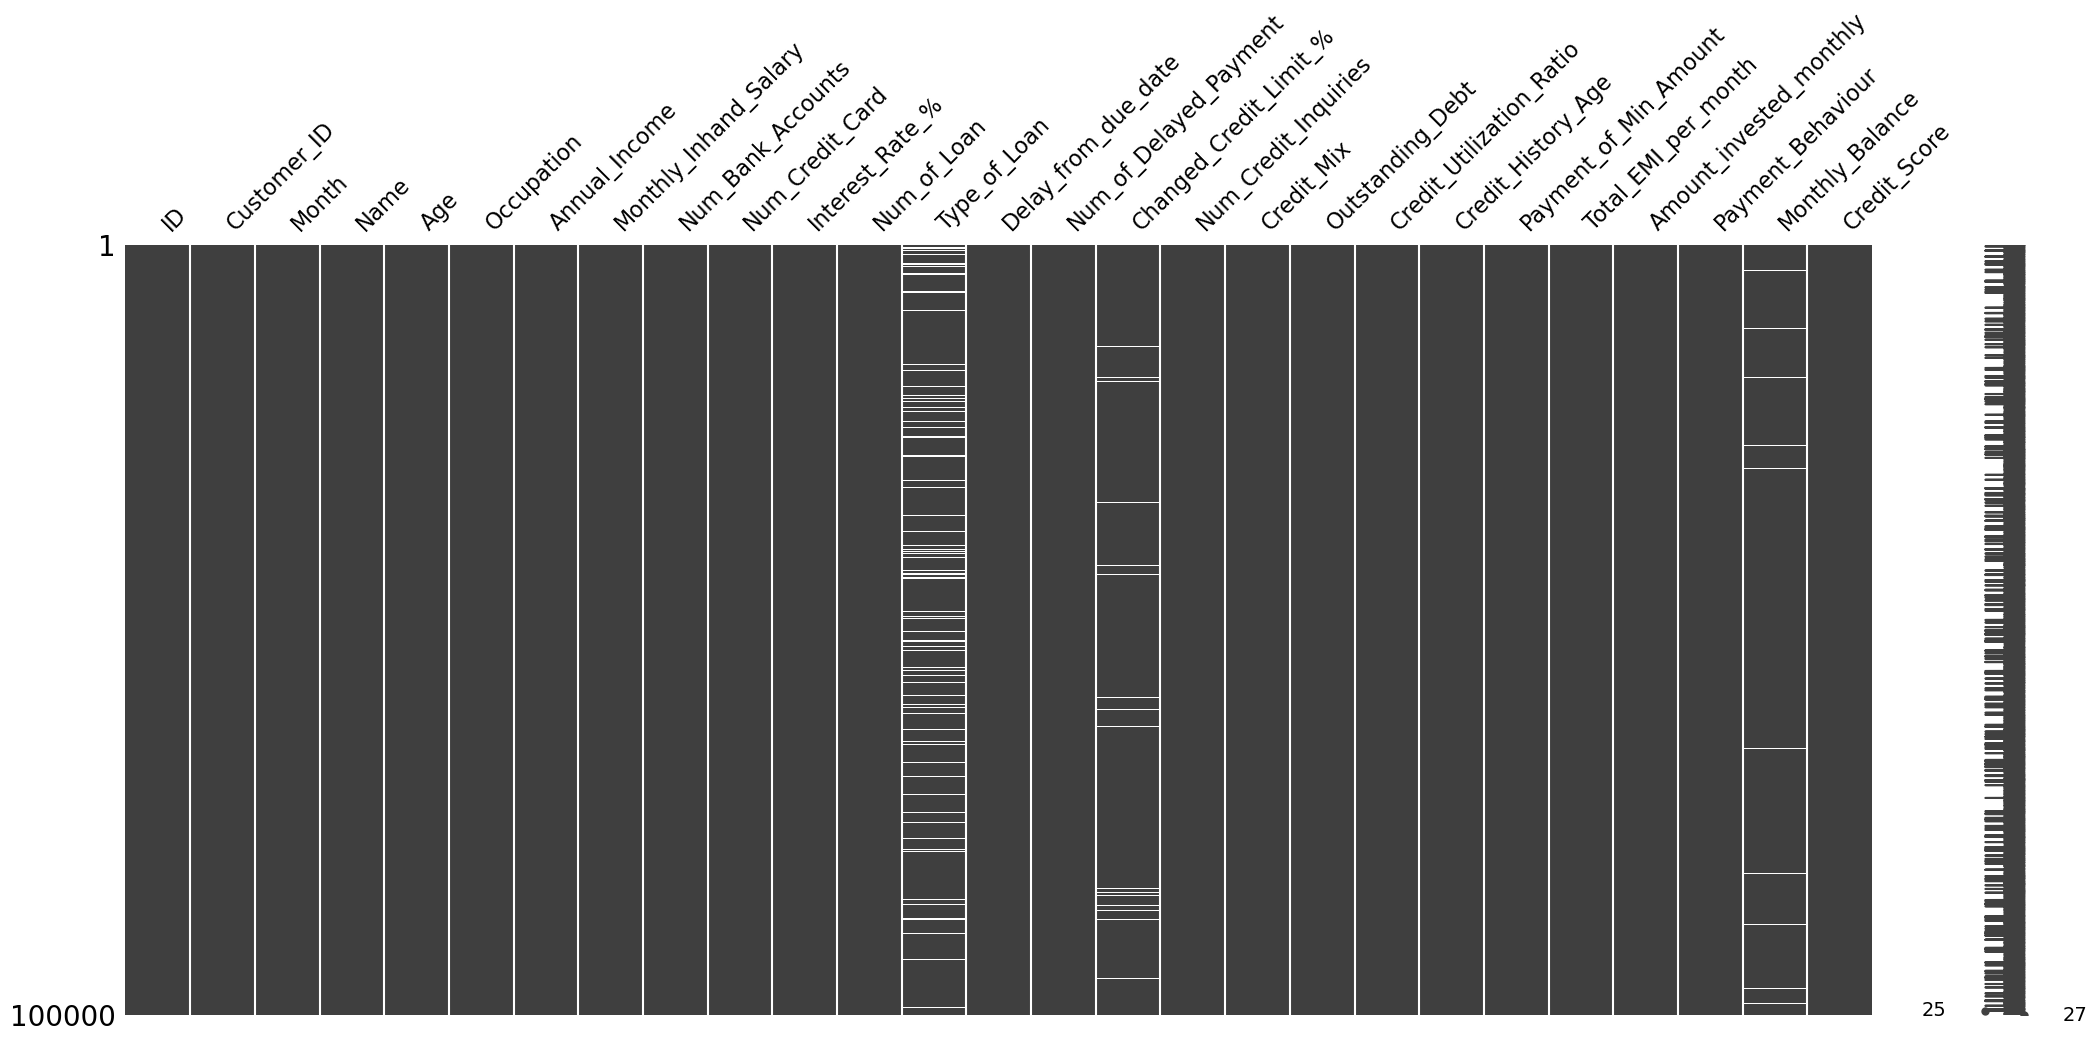

In [383]:
msn.matrix(df)

In [384]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Type_of_Loan                11.408
Changed_Credit_Limit_%       2.091
Monthly_Balance              1.209
ID                           0.000
Num_of_Delayed_Payment       0.000
Payment_Behaviour            0.000
Amount_invested_monthly      0.000
Total_EMI_per_month          0.000
Payment_of_Min_Amount        0.000
Credit_History_Age           0.000
Credit_Utilization_Ratio     0.000
Outstanding_Debt             0.000
Credit_Mix                   0.000
Num_Credit_Inquiries         0.000
Delay_from_due_date          0.000
Customer_ID                  0.000
Num_of_Loan                  0.000
Interest_Rate_%              0.000
Num_Credit_Card              0.000
Num_Bank_Accounts            0.000
Monthly_Inhand_Salary        0.000
Annual_Income                0.000
Occupation                   0.000
Age                          0.000
Name                         0.000
Month                        0.000
Credit_Score                 0.000
dtype: float64

In [385]:
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        non_null_values = df[col].dropna().values
        df[col] = df[col].apply(lambda x: np.random.choice(non_null_values) if pd.isnull(x) else x)

In [386]:
df['Type_of_Loan'] = df['Type_of_Loan'].ffill()

--------

**Duplicates**

In [387]:
df.duplicated().sum()

0

No Duplicates

-------

### Handle Outliers

In [388]:
# plt.figure(figsize=(12,10))
# for i, col in enumerate(num_cols):
#     plt.subplot(6,3,i+1)
#     sns.boxplot(data= df, x=col)
#     plt.title(col)

# plt.tight_layout()
# plt.show()

These outliers are valid outliers, so i keep them them as it is.

--------

## Exploratory Data Analysis

### Univariate Analysis

In [389]:
# plt.figure(figsize=(20, 15))  

# for i, col in enumerate(num_cols):  
#     plt.subplot(6, 3, i + 1)
#     sns.histplot(data=df, x=col, kde=True)
#     plt.title(col)
    
# plt.tight_layout()
# plt.show()

- Age from 14 to 56
- Annual Income from 7005 to 24198062
- Montly inhand salary from 303 to 15204
- Num bank accounts from 1 to 10
- Num of credit card from 1 to 10
- Interest rate from 1% to 36%
- Num of loan from 0 to 9
- Delay from due date form 0 to 67 days
- Num of delayed paymenta form 0 to 28
- Changed credit limit from -6.5% to ~37%
- Num credit imquiries from 0 to 17 
- Outstanding debt from 0.23 to 4998
- credit utilization ratio from 20 to 50
- total emi per month from 0 to 1977$
- Amount invested monthly from 0 to 1977
- Monthly balance from 0 to 1602

In [390]:
# plt.figure(figsize=(20,20))
# for i, col in enumerate(cat):  
#     plt.subplot(4, 3, i + 1)
#     top_15 = df[col].value_counts().nlargest(15).sort_values(ascending=False).index
#     sns.countplot(data=df[df[col].isin(top_15)], x=col, order=top_15)
#     plt.title(col)
#     plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

-  Data is from Jan to Aug total 8 months
-  Total 15 Occupations
-  3 types of credit mix standard, Good, Bad
-  2 types of payment min amount Yes and No
-  3 types of credit score Standard, Good and Poor

-----------

### Bivariate Analysis

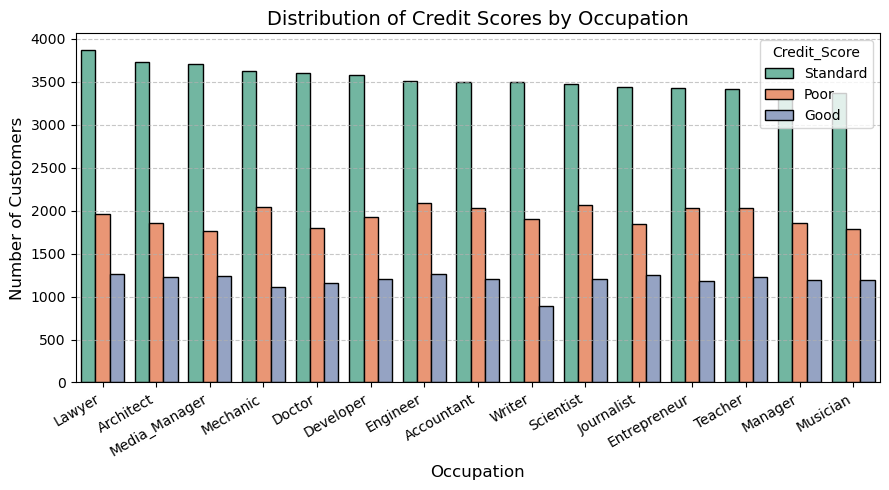

In [391]:
occ_credit = df.groupby(['Occupation', 'Credit_Score'])['Credit_Score'].count().sort_values(ascending=False).reset_index(name='Count')


plt.figure(figsize=(9, 5))
sns.barplot(data=occ_credit,x='Occupation',y='Count',hue='Credit_Score',palette='Set2',edgecolor='black')

plt.title('Distribution of Credit Scores by Occupation', fontsize=14)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Lawyers, Architects, and Media Managers have a high number of customers, and these groups tend to have higher credit scores. In contrast, occupations like Teachers, Managers, and Musicians have fewer customers, and their credit scores are generally lower.

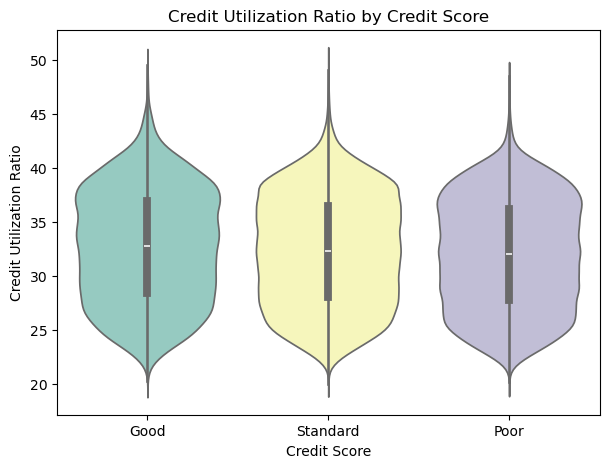

In [392]:
plt.figure(figsize=(7, 5))
sns.violinplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, palette='Set3')
plt.title('Credit Utilization Ratio by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Credit Utilization Ratio')
plt.show()

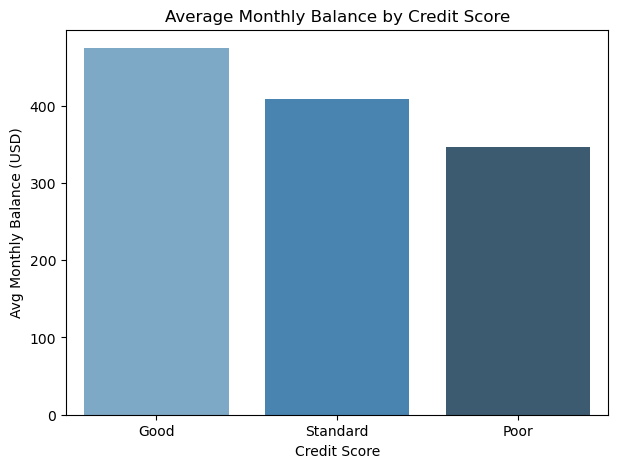

In [393]:
avg_balance = df.groupby('Credit_Score')['Monthly_Balance'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=avg_balance, x='Credit_Score', y='Monthly_Balance', palette='Blues_d')
plt.title('Average Monthly Balance by Credit Score')
plt.ylabel('Avg Monthly Balance (USD)')
plt.xlabel('Credit Score')
plt.show()


Good Credit Score holder have higher Monthly Balance left then other

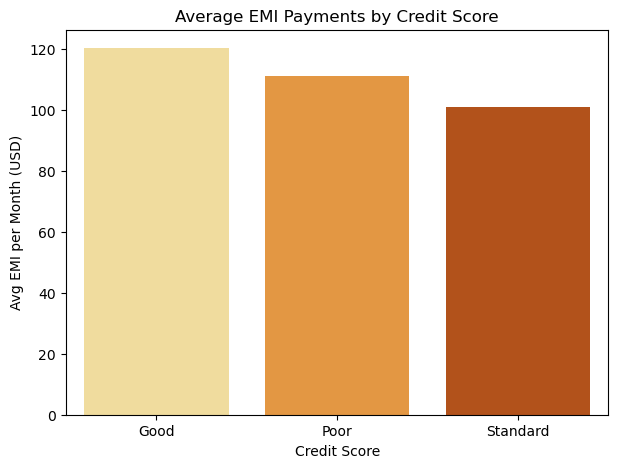

In [394]:
avg_emi = df.groupby('Credit_Score')['Total_EMI_per_month'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=avg_emi, x='Credit_Score', y='Total_EMI_per_month', palette='YlOrBr')
plt.title('Average EMI Payments by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Avg EMI per Month (USD)')
plt.show()


In [395]:
# plt.figure(figsize=(8, 5))
# sns.jointplot(data=df, x='Annual_Income', y='Outstanding_Debt', hue='Credit_Score', palette='rocket', height=8)
# plt.suptitle('Income vs Outstanding Debt by Credit Score', y=1.02)
# plt.show()


----------------

### Multivariate Analysis

**PairPlot**

In [396]:
# sns.pairplot(df[['Age','Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt','Credit_History_Age', 'Credit_Utilization_Ratio', 'Credit_Score']], 
#              hue='Credit_Score', palette='Set1')
# plt.suptitle('Pairplot of Key Financial Features by Credit Score', y=1.02)
# plt.show()


In [397]:
# plt.figure(figsize=(12, 8))

# corr = df[num_cols].corr()

# sns.heatmap(corr,annot=True,fmt=".2f", cmap='coolwarm', linecolor='gray')

# plt.title('Correlation Matrix Heatmap', fontsize=16,)
# plt.xticks(rotation=90, ha='right', fontsize=12)
# plt.yticks(rotation=0, fontsize=12)
# plt.tight_layout()
# plt.show()

-------------

## Feature Engineering

In [398]:
clean_data = df.copy()

We remove some irrelevent features that didn't help in prediction.

In [399]:
df.drop(columns=['ID', 'Customer_ID', 'Month', 'Name'],axis=1,inplace=True)

Remove those categorical column that did not help in prediction

In [400]:
cat = df.select_dtypes(include=['object']).columns

In [401]:
print('Unique Values in each column')
for i in cat:
    print(f'{i}: {df[i].nunique()}')

Unique Values in each column
Occupation: 15
Type_of_Loan: 9
Credit_Mix: 3
Credit_History_Age: 405
Payment_of_Min_Amount: 2
Payment_Behaviour: 6
Credit_Score: 3


Remove those columns which have high unique values

In [402]:
thres = 20
df = df.drop(columns=[col for col in cat if df[col].nunique() > thres])

In [403]:
cat

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [404]:
df['Credit_Mix'] = df['Credit_Mix'].map({'Bad': 0, 'Standard': 1, 'Good': 2})

In [405]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'No': 0, 'Yes': 1})

In [406]:
pb_map = {'Low_spent_Small_value_payments': 0,
          'Low_spent_Medium_value_payments': 1,
          'Low_spent_Large_value_payments': 2,
          'High_spent_Small_value_payments': 3,
          'High_spent_Medium_value_payments': 4,
          'High_spent_Large_value_payments': 5}

df['Payment_Behaviour'] = df['Payment_Behaviour'].map(pb_map)


In [407]:
df['Credit_Score']=df['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

In [408]:
df['Credit_Score'].value_counts()

Credit_Score
1    53174
0    28998
2    17828
Name: count, dtype: int64

Lets check the target column is balanced or imbalanced.

In [409]:
px.pie(df,names='Credit_Score')

The target column Credit_Score is moderately imbalanced, with the "Good" class being underrepresented. To address this imbalance, we can apply techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority classes, or alternatively, assign class weights during model training to give more importance to the minority class and ensure balanced learning

--------

## Model Training

In [410]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [411]:
cat_enc = ['Occupation', 'Type_of_Loan']

In [413]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_enc)
    ],
    remainder='passthrough'
)

# 3. Pipeline
pipe = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(random_state=42, max_depth=50))
])

In [414]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Occupation',
                                                   'Type_of_Loan'])])),
                ('clf', RandomForestClassifier(max_depth=50, random_state=42))])

In [415]:
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("✅ Train Accuracy: {:.4f}".format(accuracy_score(y_train, train_preds)))
print("✅ Test Accuracy: {:.4f}".format(accuracy_score(y_test, test_preds)))

# Confusion Matrix
print("\n🧾 Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, test_preds))

# Classification Report
print("\n📄 Classification Report (Test Set):")
print(classification_report(y_test, test_preds, target_names=['Poor', 'Standard', 'Good']))

✅ Train Accuracy: 1.0000
✅ Test Accuracy: 0.8131

🧾 Confusion Matrix (Test Set):
[[4872  913   14]
 [1249 8659  727]
 [  18  817 2731]]

📄 Classification Report (Test Set):
              precision    recall  f1-score   support

        Poor       0.79      0.84      0.82      5799
    Standard       0.83      0.81      0.82     10635
        Good       0.79      0.77      0.78      3566

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000



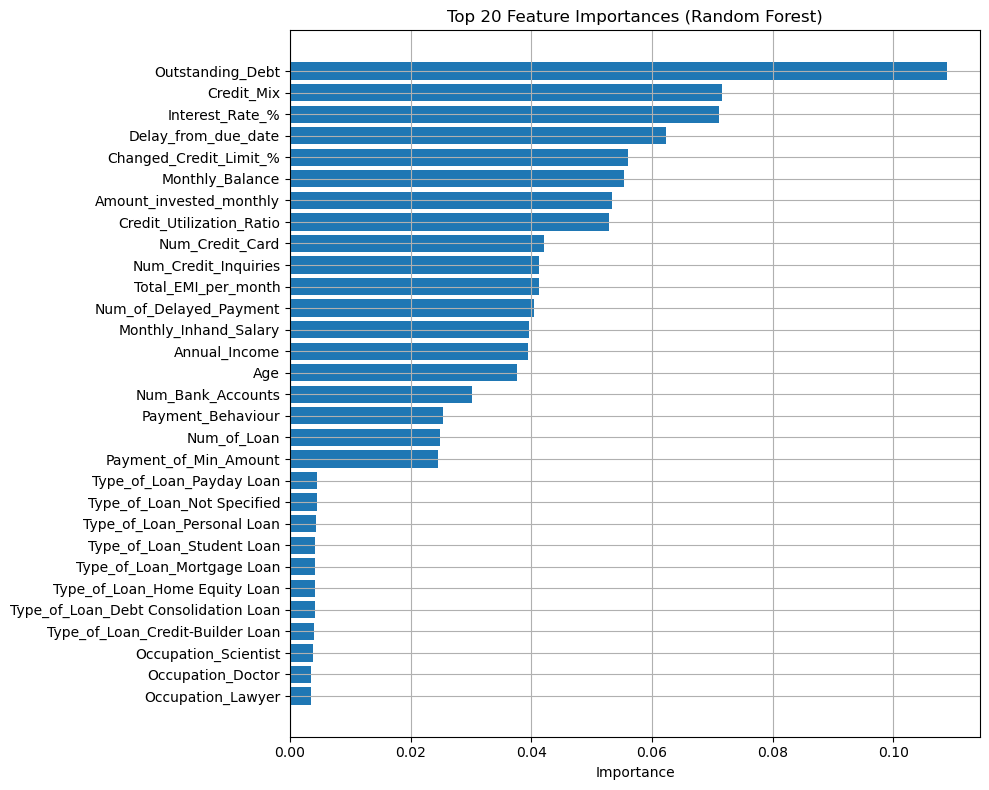

In [417]:
rf_model = pipe.named_steps['clf']

# 2. Get feature names from ColumnTransformer
# Get one-hot encoded column names
ohe = pipe.named_steps['pre'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(cat_enc)

# Combine with 'passthrough' numeric columns
numeric_features = [col for col in X.columns if col not in cat_enc]
all_feature_names = list(ohe_feature_names) + numeric_features

# 3. Get feature importances
importances = rf_model.feature_importances_

# 4. Create DataFrame for plotting
feat_imp = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. Plot
plt.figure(figsize=(10, 8))
top_n = 30  # Show top 20 features
plt.barh(feat_imp['Feature'][:top_n][::-1], feat_imp['Importance'][:top_n][::-1])
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.grid(True)
plt.tight_layout()
plt.show()

In [419]:
feat_imp

,Feature,Importance
34,Outstanding_Debt,0.108931
33,Credit_Mix,0.071666
27,Interest_Rate_%,0.071060
29,Delay_from_due_date,0.062273
31,Changed_Credit_Limit_%,0.056060
40,Monthly_Balance,0.055421
38,Amount_invested_monthly,0.053338
35,Credit_Utilization_Ratio,0.052885
26,Num_Credit_Card,0.042085
32,Num_Credit_Inquiries,0.041345
